In [18]:
# Questão 05 - Diagnósticos de doenças cardíacas

import numpy as np
import pandas as pd

In [19]:
import zipfile
import os

zip_file_path = 'cardio_train.csv.zip'
extracted_folder_path = 'extracted_data'

os.makedirs(extracted_folder_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

csv_file_path = os.path.join(extracted_folder_path, 'cardio_train.csv')

df = pd.read_csv(csv_file_path, sep=';')

display(df.head())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Pré-processamento dos Dados

Primeiro, vamos verificar se há valores ausentes no nosso DataFrame e, se houver, tratá-los. Em seguida, normalizaremos as variáveis numéricas para garantir que todas tenham a mesma escala, o que é importante para alguns modelos de classificação, como o SVM.

In [20]:
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


Como não há valores ausentes, passaremos para a normalização das variáveis numéricas. Precisamos identificar quais colunas são numéricas e quais são categóricas. Algumas colunas como 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active' e 'cardio' são categóricas, mesmo que representadas por números. 'id' é apenas um identificador e não deve ser usado para treinamento. As colunas 'age', 'height', 'weight', 'ap_hi' e 'ap_lo' são numéricas contínuas ou ordinais e podem se beneficiar da normalização.

In [21]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

df_numeric = df[numeric_cols]
df_categorical = df.drop(columns=numeric_cols + ['id', 'cardio'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols, index=df.index)

print("\nDataFrame numérico normalizado:")
display(df_scaled.head())



DataFrame numérico normalizado:


,age,height,weight,ap_hi,ap_lo
0,-0.436062,0.443452,-0.847873,-0.122182,-0.088238
1,0.307686,-1.018168,0.749831,0.072610,-0.035180
2,-0.247997,0.078047,-0.708942,0.007679,-0.141297
3,-0.748152,0.565254,0.541435,0.137541,0.017879
4,-0.808543,-1.018168,-1.264666,-0.187113,-0.194356


In [22]:
print("\nDataFrame categórico (já codificado):")
display(df_categorical.head())


DataFrame categórico (já codificado):


,gender,cholesterol,gluc,smoke,alco,active
0,2,1,1,0,0,1
1,1,3,1,0,0,1
2,1,3,1,0,0,0
3,2,1,1,0,0,1
4,1,1,1,0,0,0


In [23]:
df_processed = pd.concat([df_scaled, df_categorical, df['cardio']], axis=1).head(5000)

X = df_processed.drop('cardio', axis=1)
y = df_processed['cardio']

print("\nDataFrame final pré-processado (X - 5000 linhas):")
display(X.head())
print("\nVariável alvo (y - 5000 linhas):")
display(y.head())


DataFrame final pré-processado (X - 5000 linhas):


,age,height,weight,ap_hi,ap_lo,gender,cholesterol,gluc,smoke,alco,active
0,-0.436062,0.443452,-0.847873,-0.122182,-0.088238,2,1,1,0,0,1
1,0.307686,-1.018168,0.749831,0.072610,-0.035180,1,3,1,0,0,1
2,-0.247997,0.078047,-0.708942,0.007679,-0.141297,1,3,1,0,0,0
3,-0.748152,0.565254,0.541435,0.137541,0.017879,2,1,1,0,0,1
4,-0.808543,-1.018168,-1.264666,-0.187113,-0.194356,1,1,1,0,0,0



Variável alvo (y - 5000 linhas):


,cardio
0,0
1,1
2,1
3,1
4,0


### Treinamento e Avaliação dos Modelos Random Forest e SVM

Agora que os dados estão divididos em conjuntos de treino e teste, vamos treinar dois modelos de classificação: Random Forest e Support Vector Machine (SVM). Em seguida, avaliaremos o desempenho de cada modelo usando Precisão, Recall e a Área sob a Curva ROC (ROC-AUC) para compará-los.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Modelo Random Forest treinado.")

Modelo Random Forest treinado.


The previous error occurred because the `train_test_split` function was called after the `RandomForestClassifier` model was initialized. I have reordered the cells to ensure that the data is split before being used for model training.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dados divididos em conjuntos de treino e teste:")
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de y_test: {y_test.shape}")

Dados divididos em conjuntos de treino e teste:
Forma de X_train: (4000, 11)
Forma de X_test: (1000, 11)
Forma de y_train: (4000,)
Forma de y_test: (1000,)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Modelo Random Forest treinado.")

Modelo Random Forest treinado.


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dados divididos em conjuntos de treino e teste:")
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de y_test: {y_test.shape}")

Dados divididos em conjuntos de treino e teste:
Forma de X_train: (4000, 11)
Forma de X_test: (1000, 11)
Forma de y_train: (4000,)
Forma de y_test: (1000,)



Avaliação do Modelo Random Forest:
Precisão: 0.7164
Recall: 0.6820
ROC-AUC: 0.7642


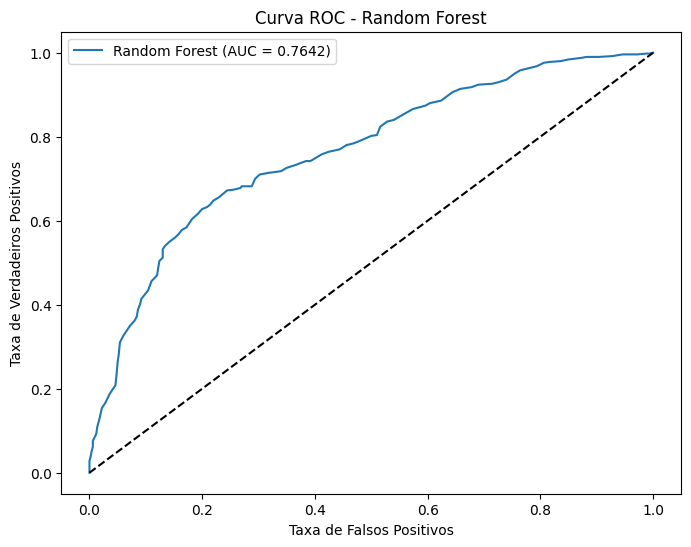

In [28]:
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"\nAvaliação do Modelo Random Forest:")
print(f"Precisão: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.show()

In [29]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

print("\nModelo SVM treinado.")


Modelo SVM treinado.



Avaliação do Modelo SVM:
Precisão: 0.7119
Recall: 0.6820
ROC-AUC: 0.7594


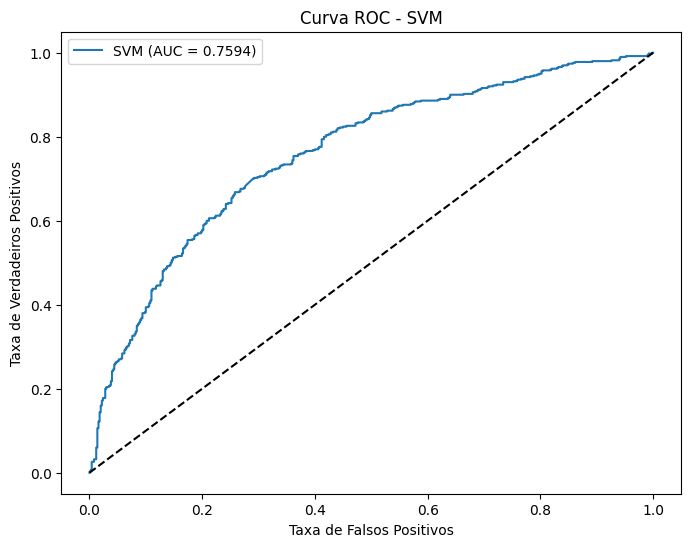

In [30]:
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

print(f"\nAvaliação do Modelo SVM:")
print(f"Precisão: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"ROC-AUC: {roc_auc_svm:.4f}")

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - SVM')
plt.legend()
plt.show()

### Comparação dos Resultados

Agora, vamos comparar as métricas de desempenho dos dois modelos para ver qual apresentou os melhores resultados na tarefa de classificar doenças cardíacas.


Comparação de Resultados:
------------------------------
Métrica         | Random Forest   | SVM            
------------------------------------------------------------
Precisão        | 0.7164          | 0.7119         
Recall          | 0.6820          | 0.6820         
ROC-AUC         | 0.7642          | 0.7594         
------------------------------------------------------------


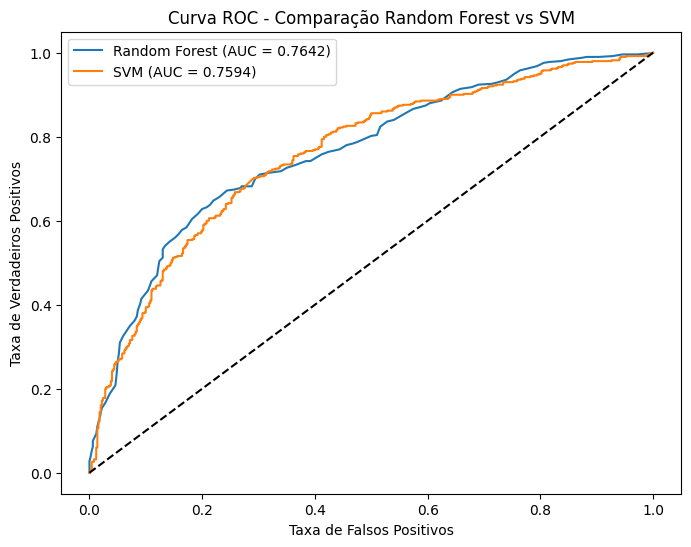

In [31]:
print("\nComparação de Resultados:")
print("-" * 30)
print(f"{'Métrica':<15} | {'Random Forest':<15} | {'SVM':<15}")
print("-" * 60)
print(f"{'Precisão':<15} | {precision_rf:<15.4f} | {precision_svm:<15.4f}")
print(f"{'Recall':<15} | {recall_rf:<15.4f} | {recall_svm:<15.4f}")
print(f"{'ROC-AUC':<15} | {roc_auc_rf:<15.4f} | {roc_auc_svm:<15.4f}")
print("-" * 60)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Comparação Random Forest vs SVM')
plt.legend()
plt.show()

### Com base nisso
**O Modelo Random Forest apresentou um melhor desempenho geral na tarefa de classificação, onde se calculou a importância de cada feature com base em quão útil ela é para prever a classe alvo.**